In [1]:
import aprofiles as apro
import numpy as np
import matplotlib.pyplot as plt

#path = "examples/data/E-PROFILE/L2_0-20000-006735_A20210908.nc"
path = "examples/data/E-PROFILE/L2_0-20000-001492_A20210909.nc"
apro_reader = apro.reader.ReadProfiles(path)
profiles = apro_reader.read()

#basic corrections
profiles.extrapolate_below(z=300, inplace=True)
#profiles.inversion(verbose=True)

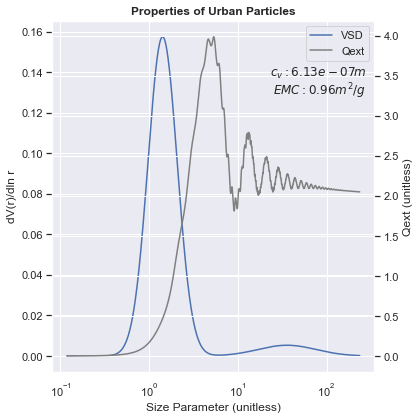

In [5]:
emc = apro.emc.EMCData(aer_type='urban', wavelength=532E-9)
emc.plot()

In [11]:
sd = apro.size_distribution.SizeDistributionData('biomass_burning')

#compute emca
nsd = sd.nsd
radius = sd.radius*1E-6 #from µm to m

In [18]:
import miepython
#size parameter
x = 2*np.pi*radius/532E-9
#refractive index
m = complex(1.5, 0.1)
#mie calculation
qext, _qsca, _qback, _g = miepython.mie(m, x)


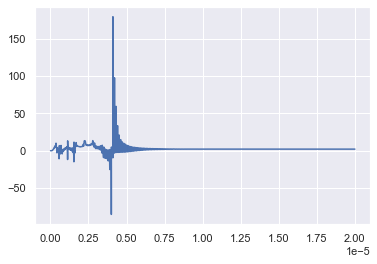

In [19]:
plt.plot(radius, qext)

In [2]:
emc = apro.emc.EMCData(aer_type='dust', wavelength=532E-9)
emc.emc

0.21847190808686245

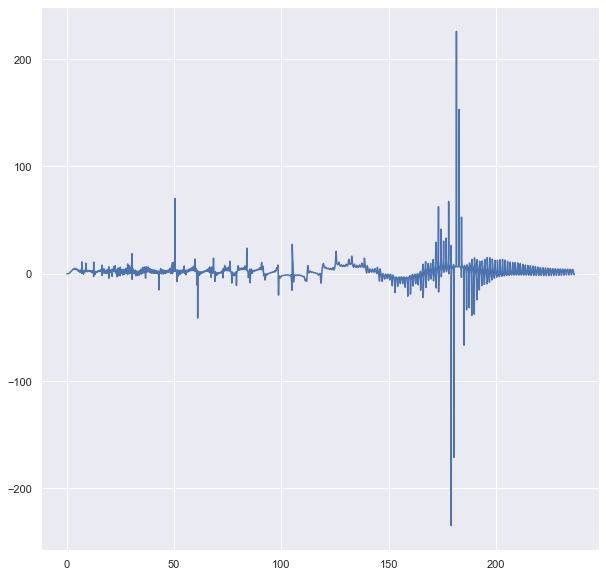

In [19]:
fig = plt.figure(figsize=(10,10))
x = [2*np.pi*r/emc.wavelength for r in emc.radius]
plt.plot(x, emc.qext)
#plt.xlim([0,2E-9])

In [17]:
emc.wavelength

5.32e-07